TODO: 
- wait the calculation for "GBL_QRT" finished.
- find the best color range for the plots.

In [1]:
import numpy as np 
import xarray as xr 
import MJO_E3SM_util as mjo
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt 
import pickle
import os 
%load_ext autoreload
%autoreload 2

In [2]:
# directory that stores all case data
dirn = '/pscratch/sd/l/linyaoly/MJO_E3SM_data/regridded_data/'
case_dir = 'control'
# case_dir = 'FIX_QRT'
# case_dir = 'GBL_QRT'

In [3]:
lat_lim_olr = 10
kmax = 9
Tlow = 100
Thig = 20
flg = str(lat_lim_olr)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
output_path = dirn+'analysis/local_MSE_budget/composite_local_MSE_budget_'+case_dir+flg+'.nc'  
comp = xr.open_dataset(output_path)

In [4]:
def plot_comp(data, vmin=None, vmax=None, cbflg=False, figname=None, clevel=7):
    ftsize = 32
    plt.rcParams.update({'font.size': ftsize})
    fig, ax = plt.subplots(1,1, figsize=(11.5,5.5))
    if vmin is None:
        vmin = np.min(-np.abs(data))
        vmax = np.max(np.abs(data))
        vmin = np.min([vmin, -vmax])
        vmax = np.max([vmax, -vmin])
        
    # ax.set_title(key, pad=20)
    if cbflg:
        v = np.linspace(vmin, vmax, clevel)
        levels = np.linspace(vmin, vmax, 25)    
        im = ax.contourf(data.lon, data.lev, data, cmap='RdBu_r', levels=levels, vmin=vmin, vmax=vmax)
    
        cb = plt.colorbar(im, ticks=v, ax=ax)
        cb.ax.set_label('Values')
    else:
        im = ax.contourf(data.lon, data.lev, data, cmap='RdBu_r', levels=25, vmin=vmin, vmax=vmax)
    
    # ax.set_xlabel('longitude')
    # ax.set_ylabel('pressure (hPa)')
    ax.invert_yaxis()    
    ax.set_xticks(np.arange(0,361,90))
    ax.set_yticks([800, 600, 400, 200])
    ax.tick_params(axis='both', labelsize=ftsize, which='major', length=10, width=1.5)
    if figname is not None:
        plt.savefig(figname, bbox_inches='tight')


In [6]:
# make directory for figures
fig_dir = './plots/'+case_dir+'/'+'vertical_comp/'
os.system('mkdir -p '+fig_dir)

0

In [7]:
comp.keys()

KeysView(<xarray.Dataset>
Dimensions:  (lat: 90, lon: 180, lev: 41)
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * lev      (lev) float64 112.1 131.0 151.2 172.7 ... 949.4 963.6 978.0 992.6
Data variables:
    dse      (lev, lat, lon) float32 ...
    qlv      (lev, lat, lon) float32 ...
    dtdse    (lev, lat, lon) float64 ...
    dtqlv    (lev, lat, lon) float64 ...
    crm_dse  (lev, lat, lon) float64 ...
    crm_qlv  (lev, lat, lon) float64 ...
    pbl_dse  (lev, lat, lon) float64 ...
    pbl_qlv  (lev, lat, lon) float64 ...
    qr       (lev, lat, lon) float64 ...
    dyn_dse  (lev, lat, lon) float64 ...
    dyn_qlv  (lev, lat, lon) float64 ...)

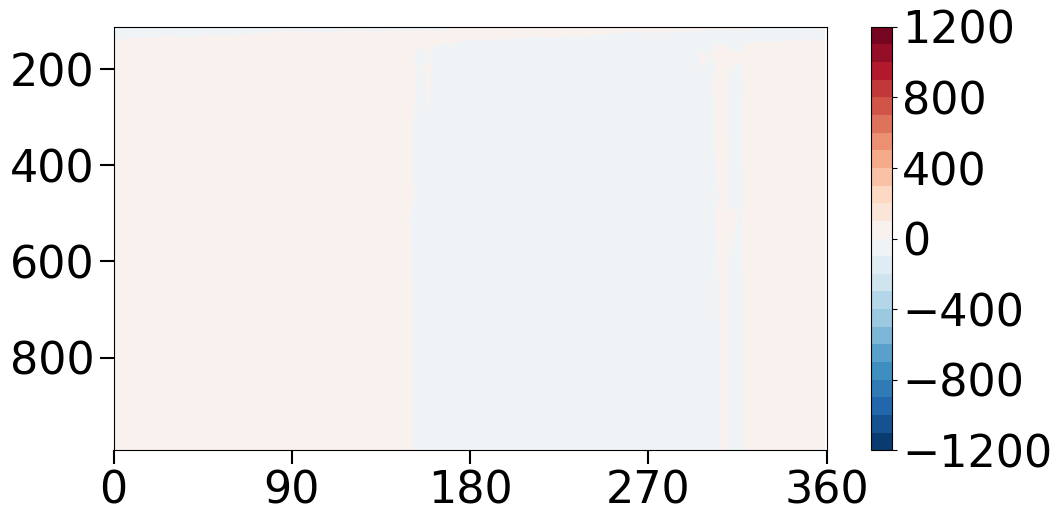

In [8]:
# plot the residual of Figure 3
vmax = 1200
resi = comp['dtdse'] + comp['dtqlv'] - (comp['crm_dse'] + comp['crm_qlv']+comp['pbl_dse']+comp['pbl_qlv']+comp['dyn_dse']+comp['dyn_qlv']+comp['qr'])
data = (resi).sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
figname = fig_dir+case_dir+'_residual.png'
plot_comp(data, vmin=-vmax, vmax=vmax, cbflg=True, figname=figname)


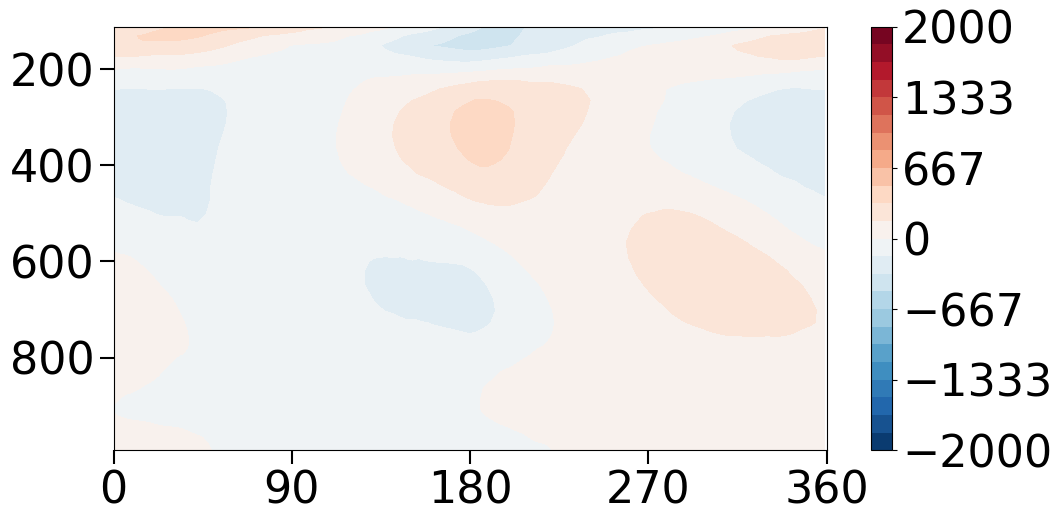

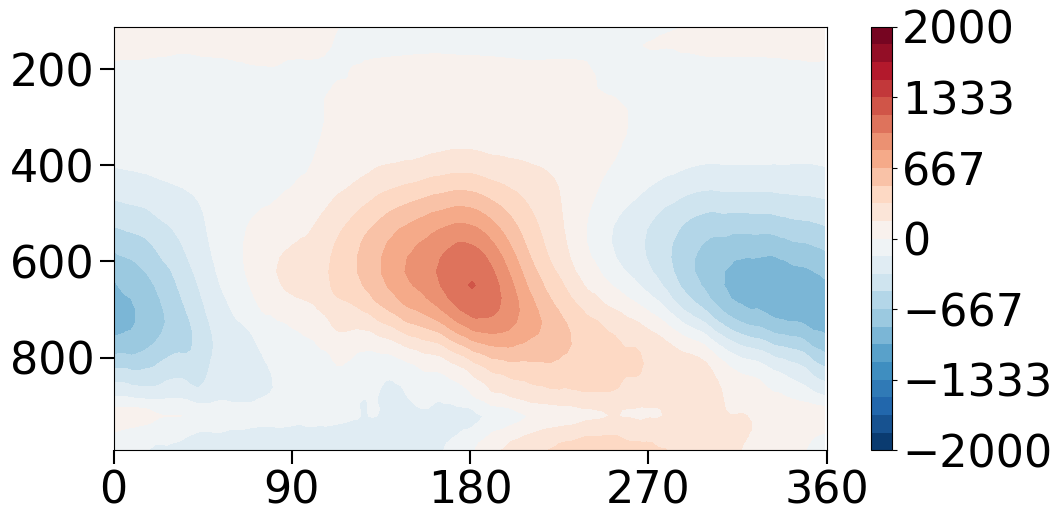

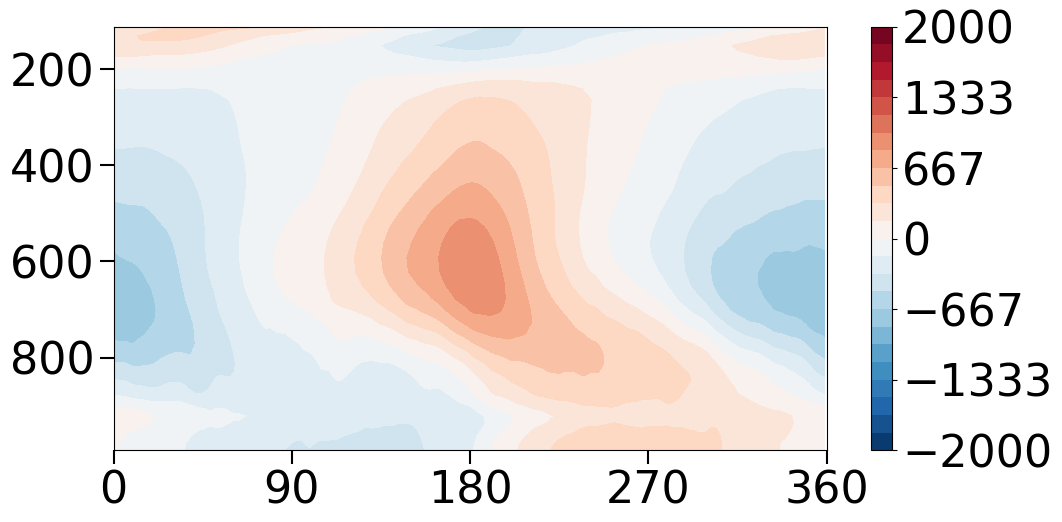

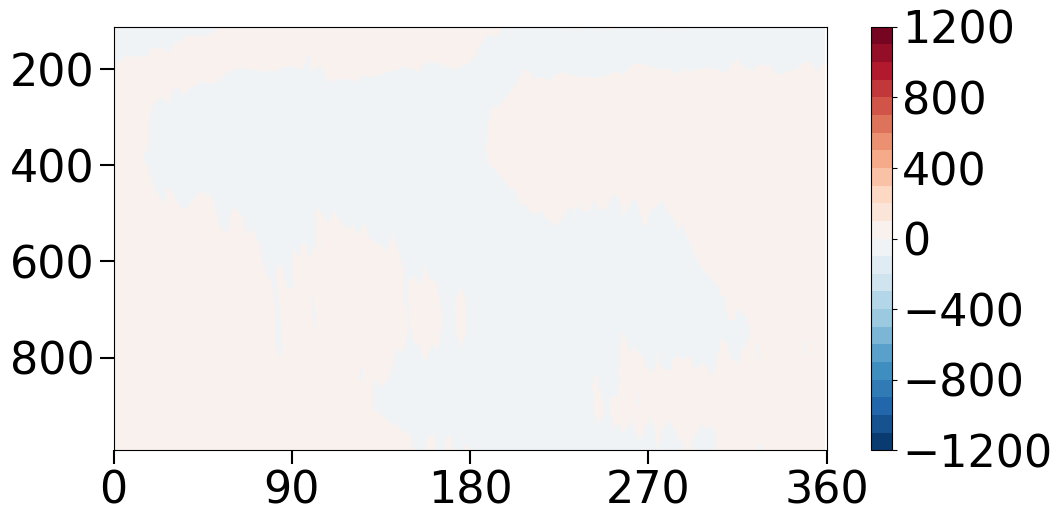

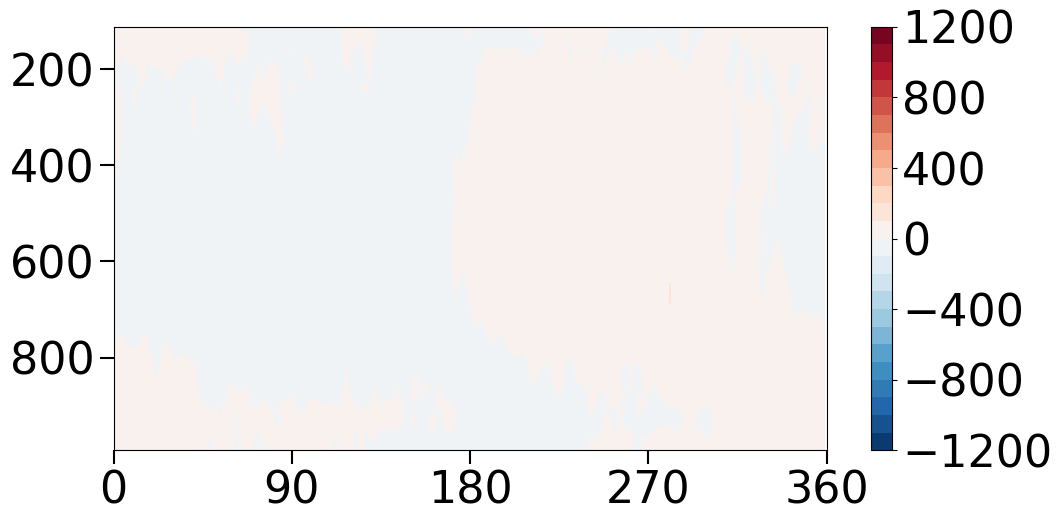

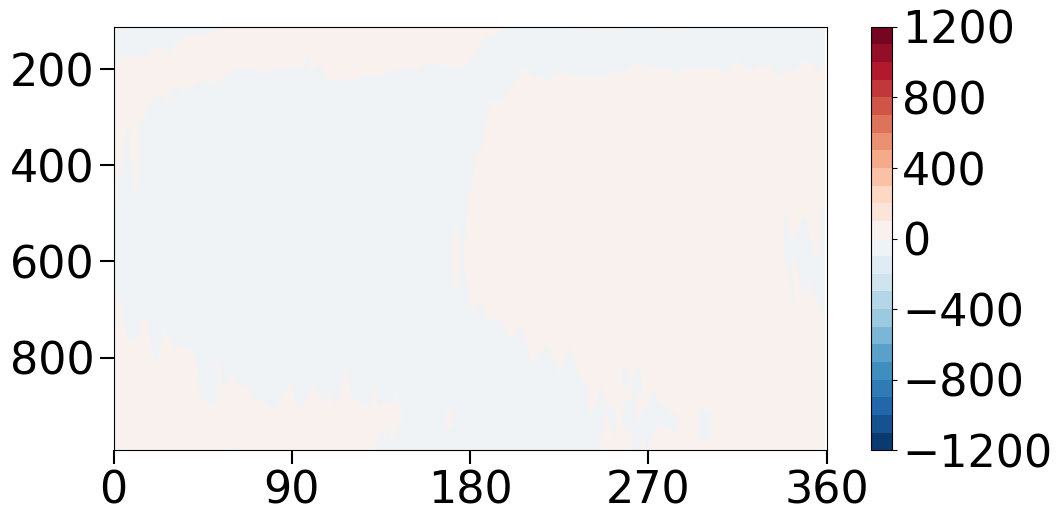

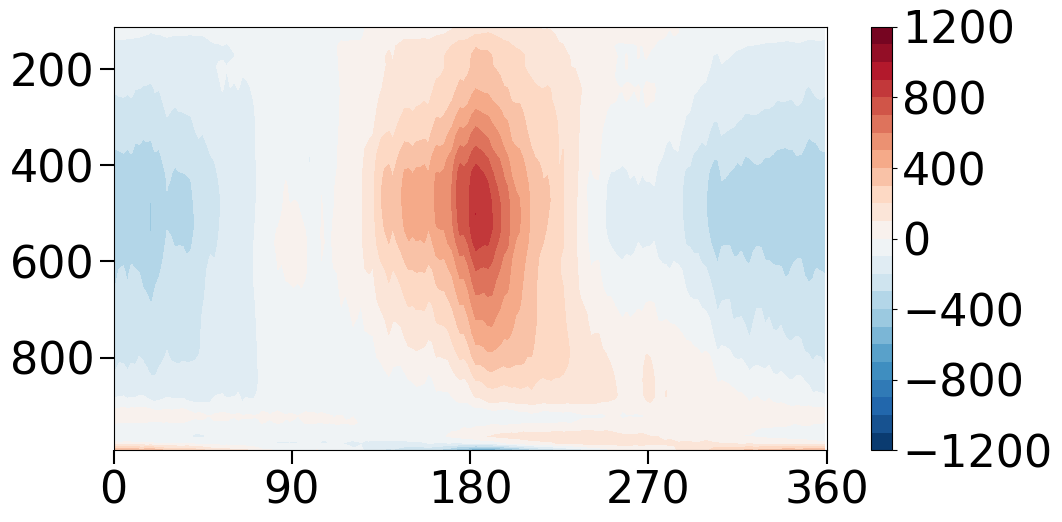

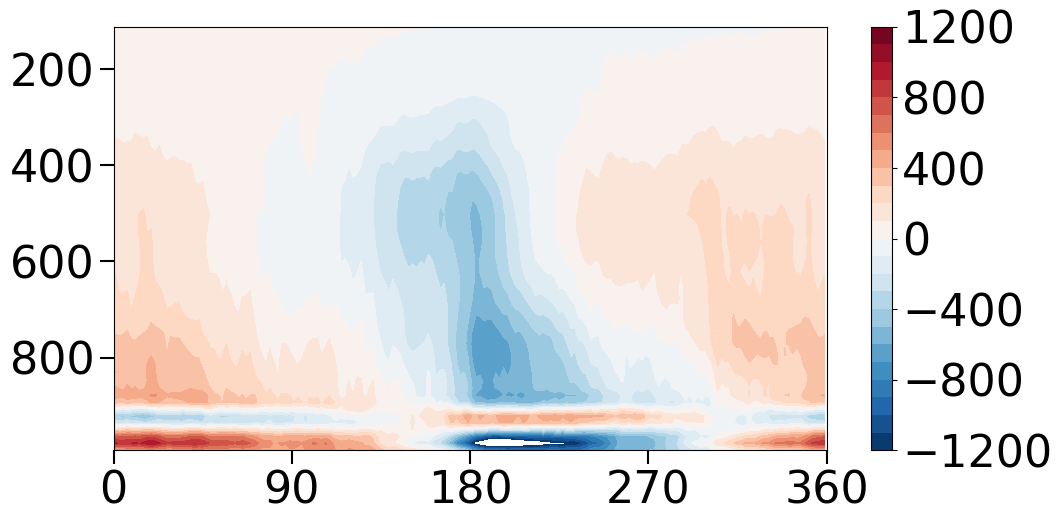

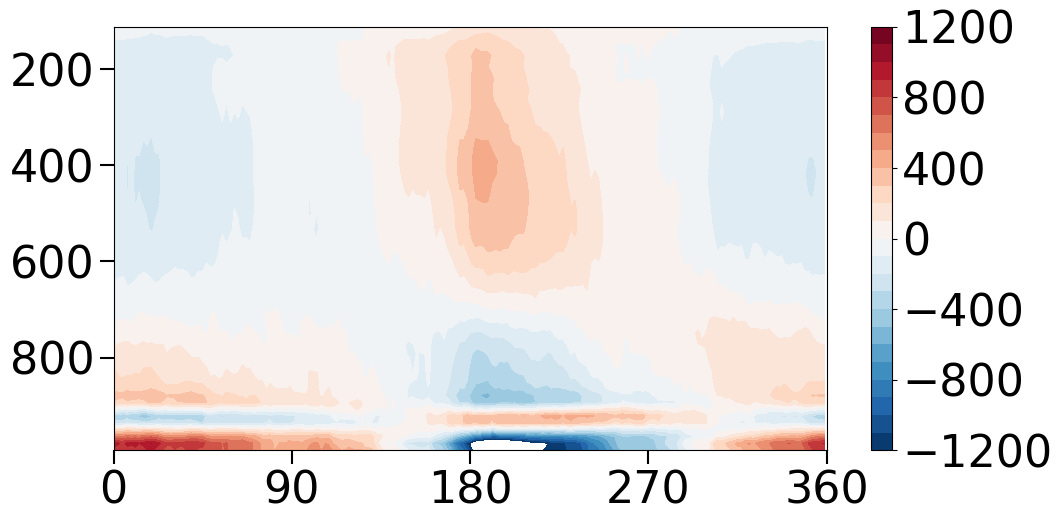

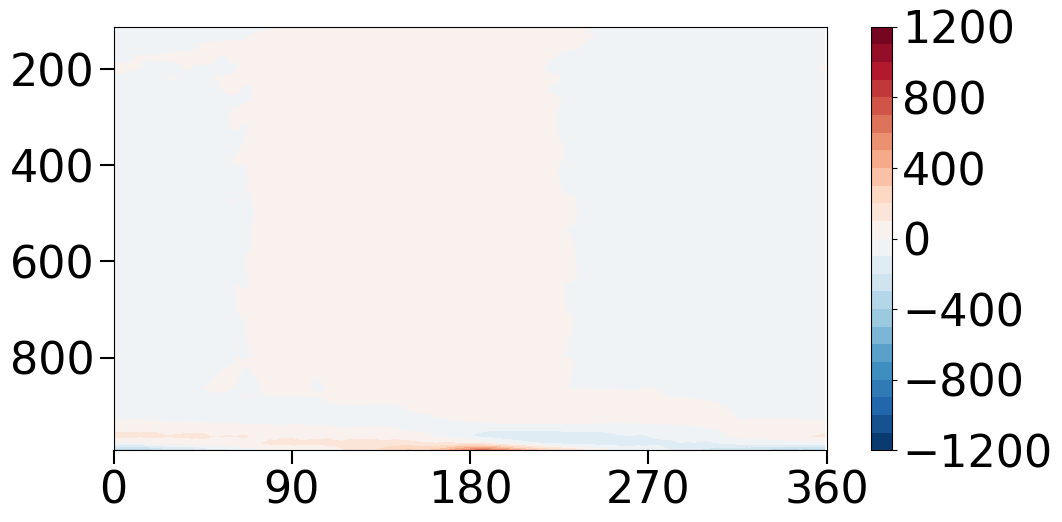

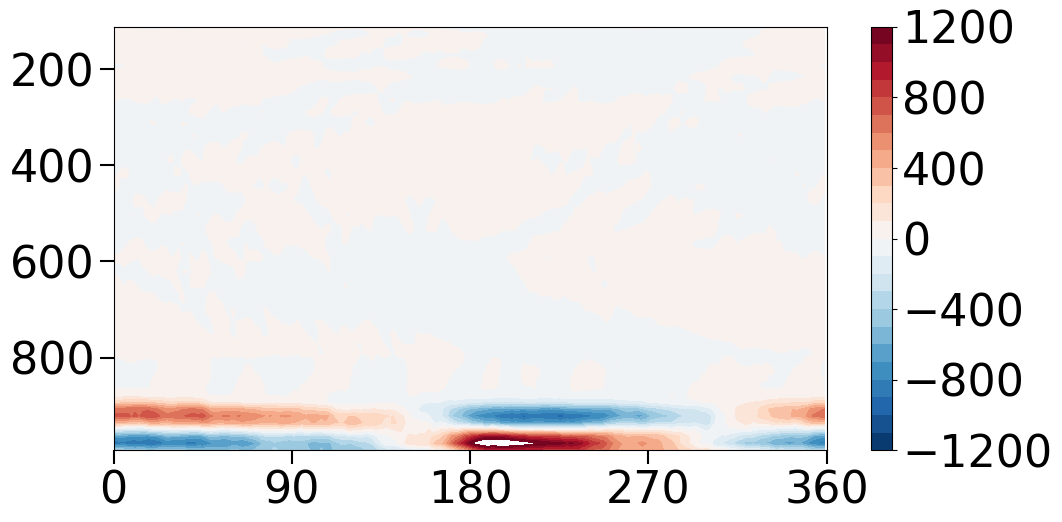

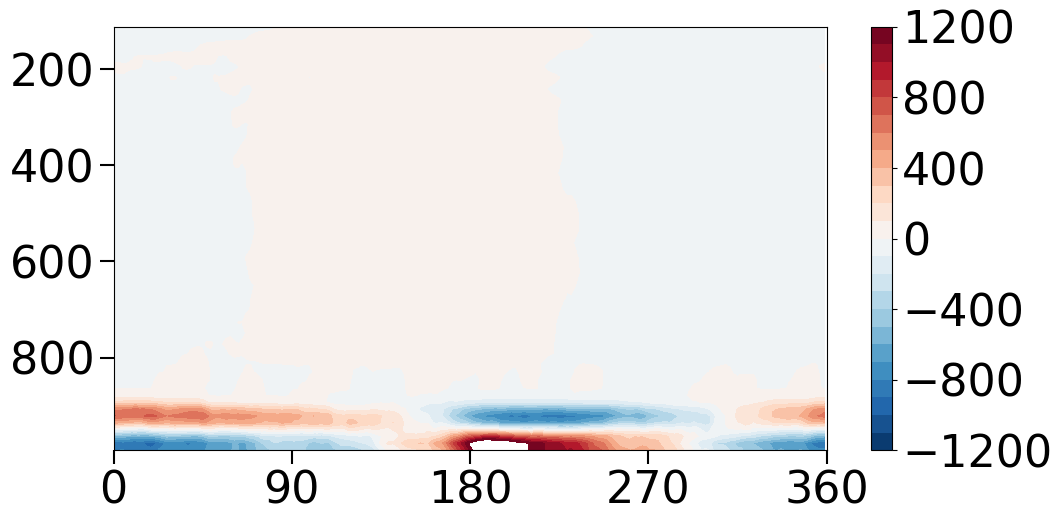

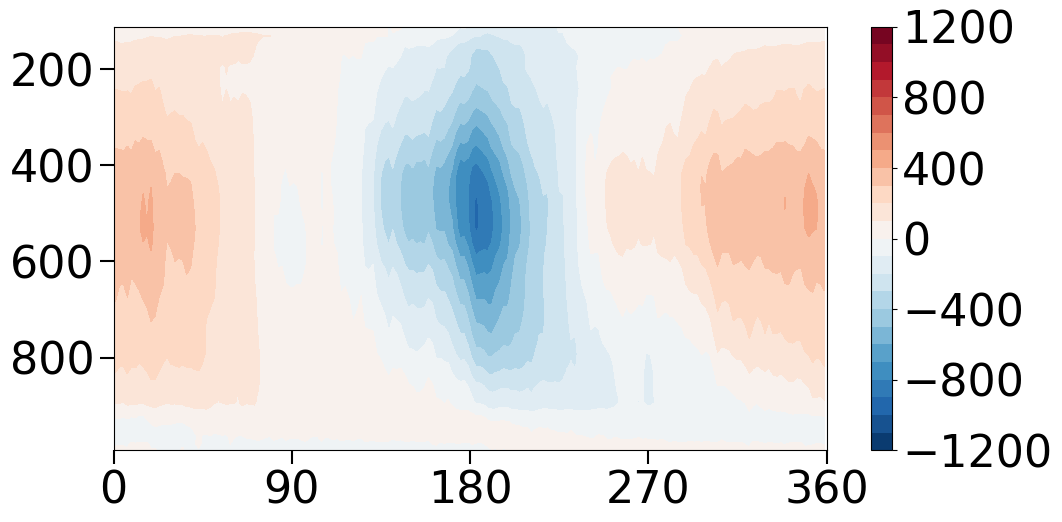

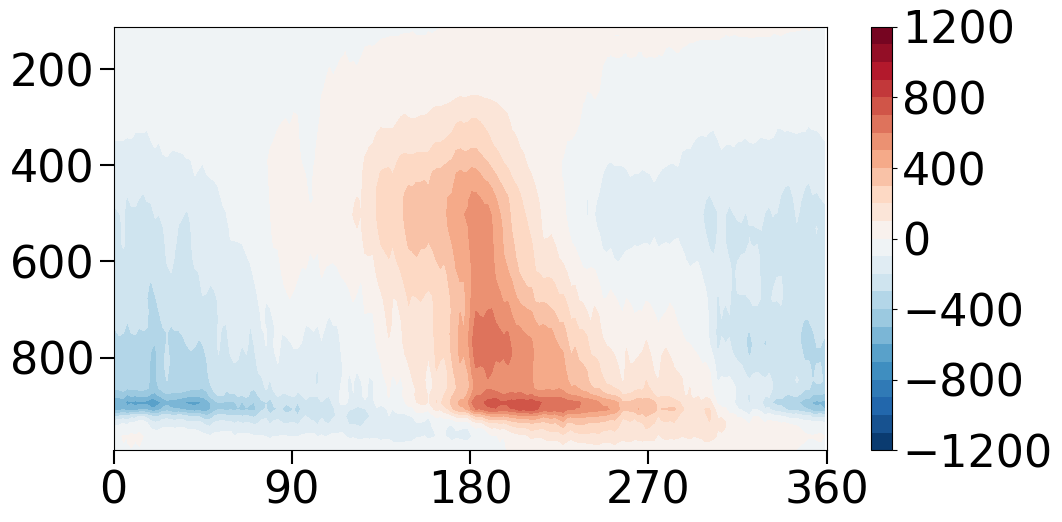

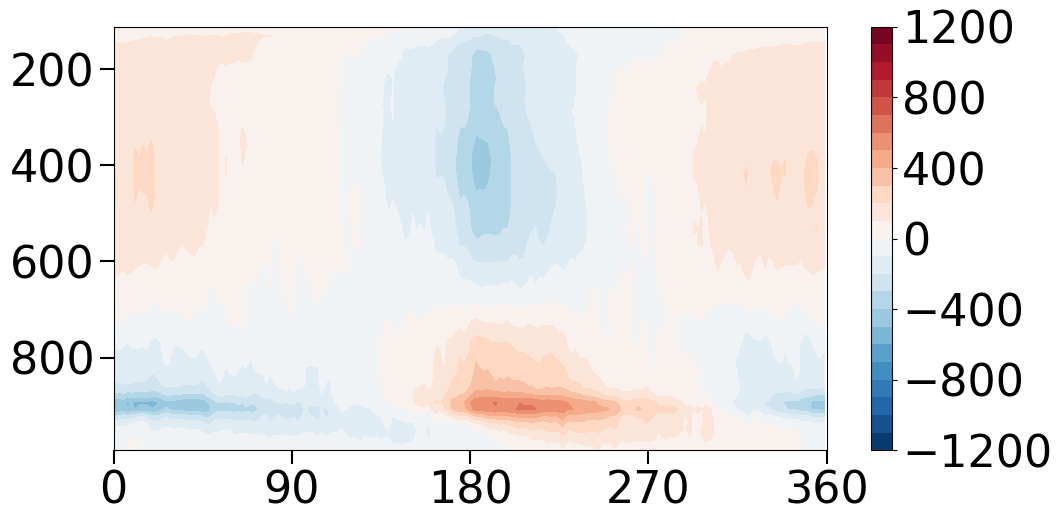

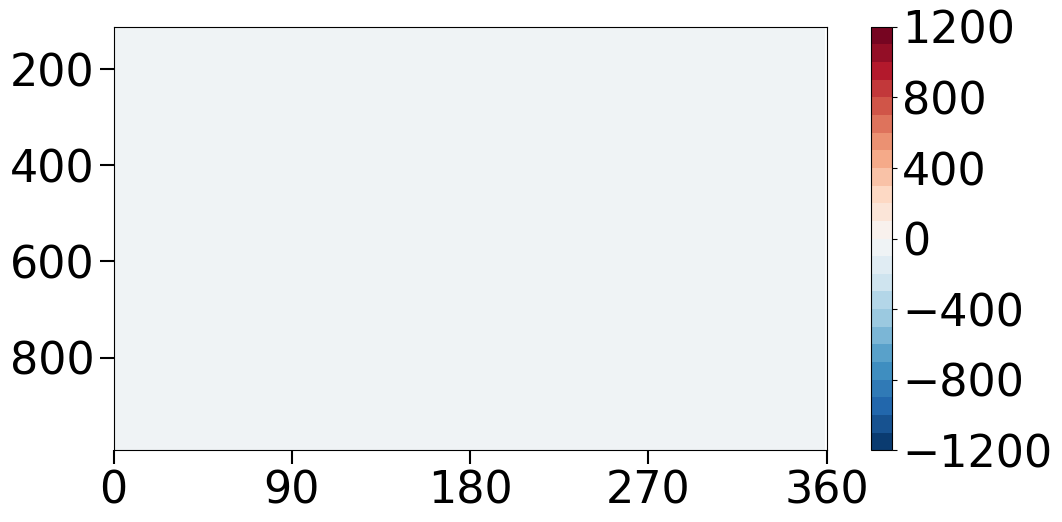

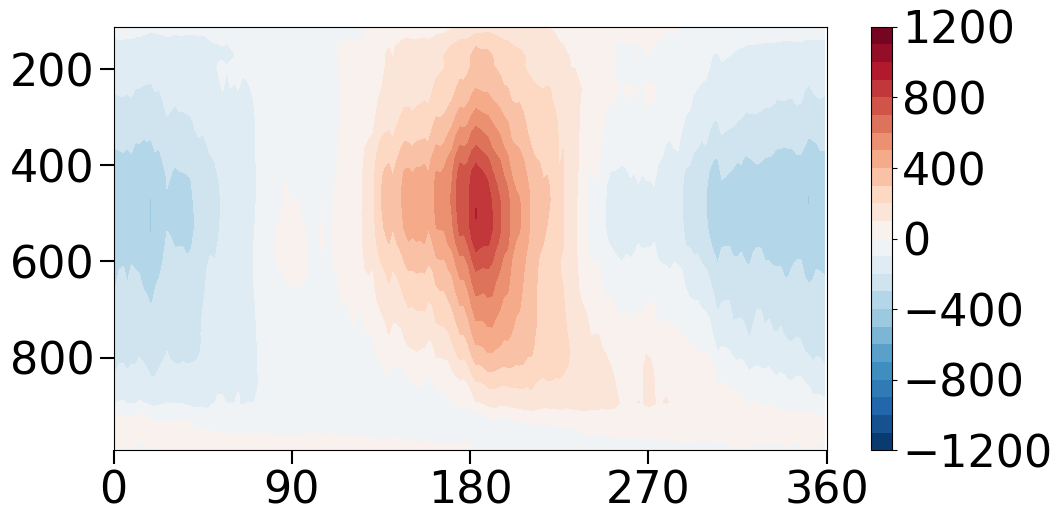

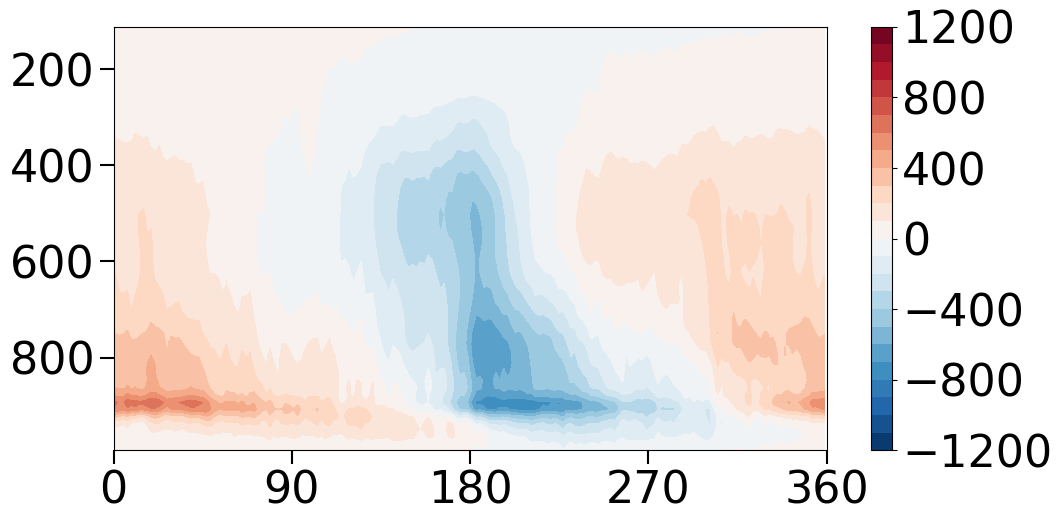

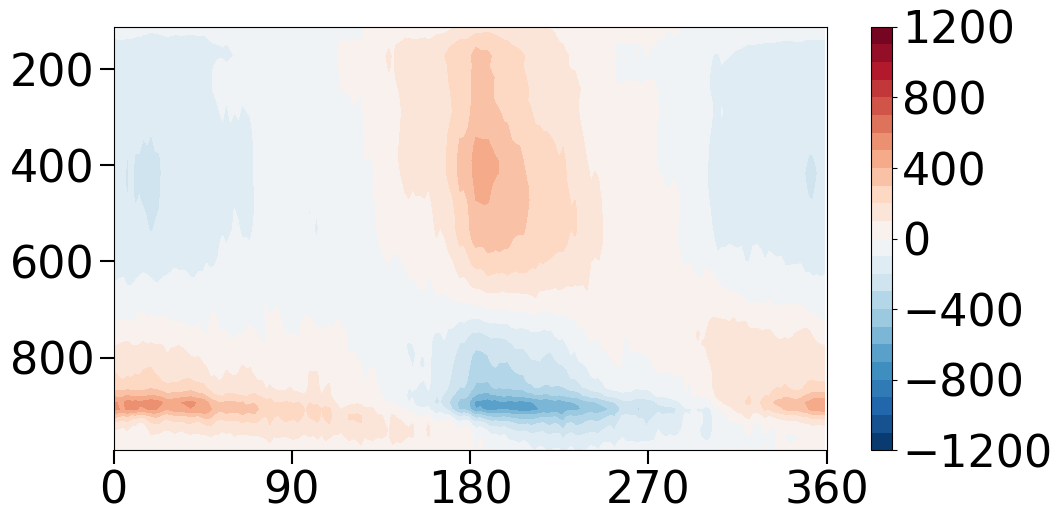

In [13]:
var_name_prefix_list = ['', 'dt','crm_','pbl_','dyn_','qr']
cbflg = True

maxflg = 0

for var_prefix in var_name_prefix_list:
    if var_prefix == '':
        vmax = 1200
        # vmax = 2000
    else:
        vmax = 1200
        # vmax = 
    
    if var_prefix == 'qr':
        data = comp[var_prefix].sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
        figname = fig_dir+case_dir+'_'+var_prefix+'.png'
        plot_comp(data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)
        maxflg = max(maxflg, np.max(np.abs(data)))
    else:
        # print(var_prefix)
        # DSE
        data = comp[var_prefix+'dse'].sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
        figname = fig_dir+case_dir+'_'+var_prefix+'dse.png'
        plot_comp(data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

        # QLV
        data1 = comp[var_prefix+'qlv'].sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
        figname = fig_dir+case_dir+'_'+var_prefix+'qlv.png'
        plot_comp(data1, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

        # MSE
        figname = fig_dir+case_dir+'_'+var_prefix+'mse.png'
        plot_comp(data1+data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

        maxflg = max(maxflg, np.max(np.abs(data)), np.max(np.abs(data1)), np.max(np.abs(data1+data)))

# crm and pbl 
# print(var_prefix)
# DSE
data = (comp['crm_dse'] + comp['pbl_dse']).sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
figname = fig_dir+case_dir+'_crm+pbl_dse.png'
plot_comp(data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

# QLV
data1 = (comp['crm_qlv'] + comp['pbl_qlv']).sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
figname = fig_dir+case_dir+'_crm+pbl_qlv.png'
plot_comp(data1, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

# MSE
figname = fig_dir+case_dir+'_crm+pbl_mse.png'
plot_comp(data1+data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)


In [14]:
maxflg 

<xarray.DataArray ()>
array(1559.6436913)